## Import Python Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### Import CSV File

In [2]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


#### Drop the blank/unrelated columns 

In [6]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

#### Check null values

In [7]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

#### Fill null values

In [8]:
df.Amount.fillna(df.Amount.median(),inplace=True)

#### Change data type amount column

In [9]:
df['Amount']=df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int32')

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

#### Rename Column

In [12]:
df.rename(columns={'Marital_Status':'Relationship_Status'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Relationship_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


##### Describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)


In [13]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9452.176429
std,1.716125e+03,12.754122,0.493632,1.115047,5219.753707
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


#### Use describe() for specific columns

In [14]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9452.176429
std,12.754122,1.115047,5219.753707
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

### Gender

#### Plotting a bar chart for Gender and it's count 

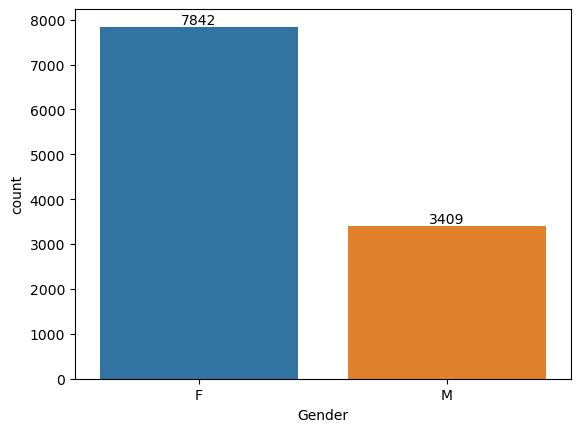

In [15]:
b=sb.countplot(x='Gender',data=df)
for bars in b.containers:
   b.bar_label(bars) 

#### Plotting a bar chart for gender vs total amount

In [16]:
sales_gender=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

In [17]:
sales_gender

,Gender,Amount
0,F,74416943
1,M,31929494


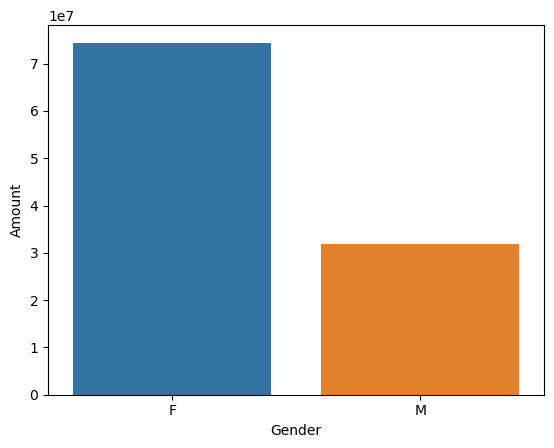

In [18]:
c=sb.barplot(x='Gender',y='Amount',data=sales_gender)


 From above graphs we can see that most of the buyers are females

# Age

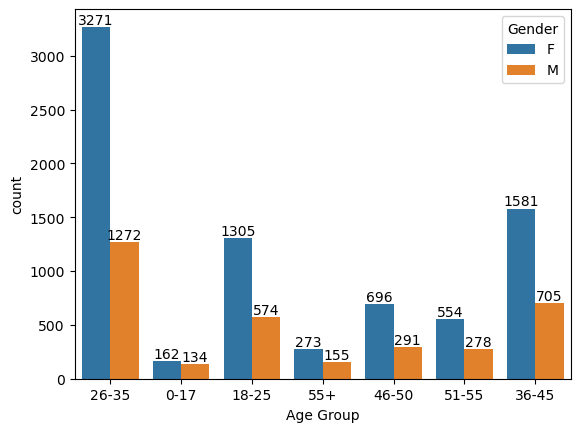

In [19]:
ab=sb.countplot(x='Age Group',data=df,hue='Gender')
for bars in ab.containers:
    ab.bar_label(bars)

### Total amount V/s Age Group


In [20]:
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

In [21]:
sales_age

,Age Group,Amount
2,26-35,42629660
3,36-45,22169321
1,18-25,17240732
4,46-50,9240280
5,51-55,8277695
6,55+,4089096
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

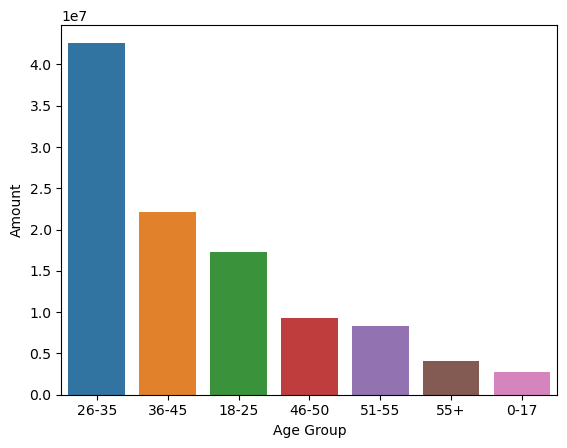

In [29]:
sb.barplot(x='Age Group',y='Amount',data=sales_age)

From the above graphs we can see that the most of the female buyers are of age group 26-35 years. 

## State

#### Total number of orders from top 10 states

<Axes: xlabel='State', ylabel='Orders'>

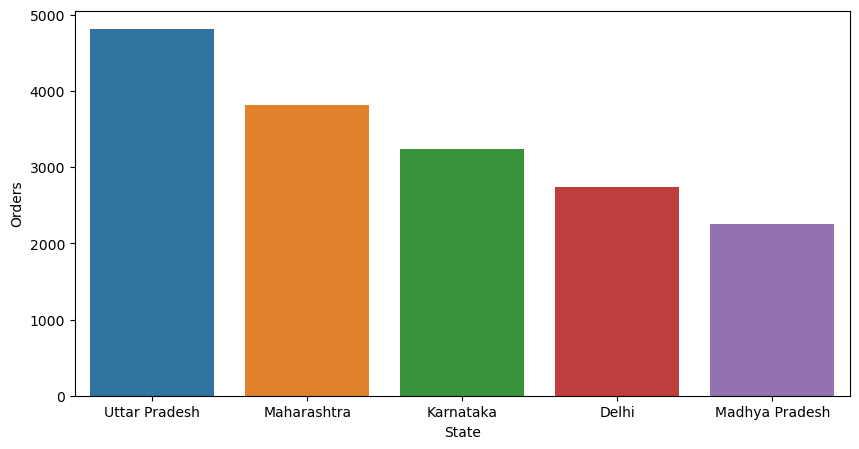

In [32]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head()
plt.figure(figsize=(10,5))
sb.barplot(x='State',data=sales_state,y='Orders')

#### Total amount/sales from top 10 state

<Axes: xlabel='State', ylabel='Amount'>

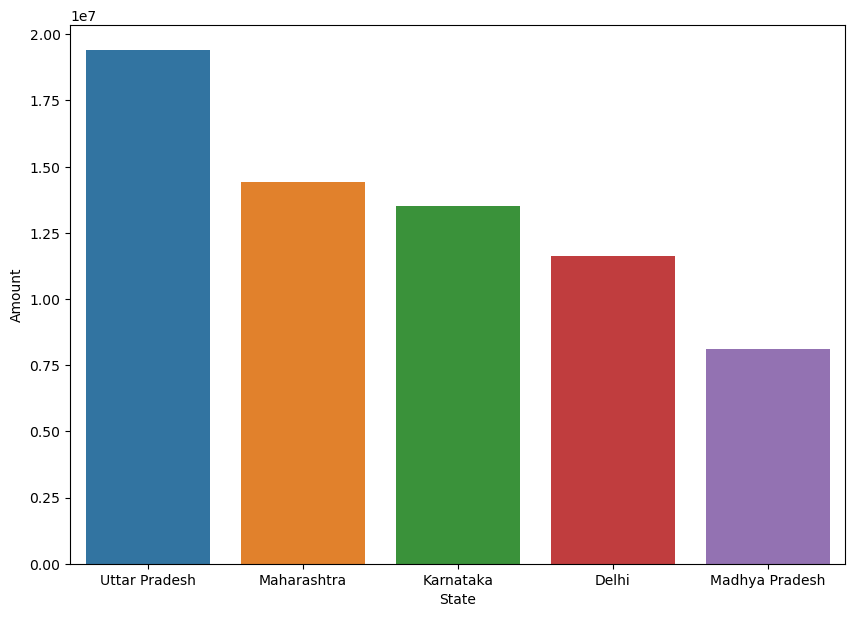

In [33]:
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head()
plt.figure(figsize=(10,7))
sb.barplot(data = sales_state, x = 'State',y= 'Amount')


From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

### Marital Status

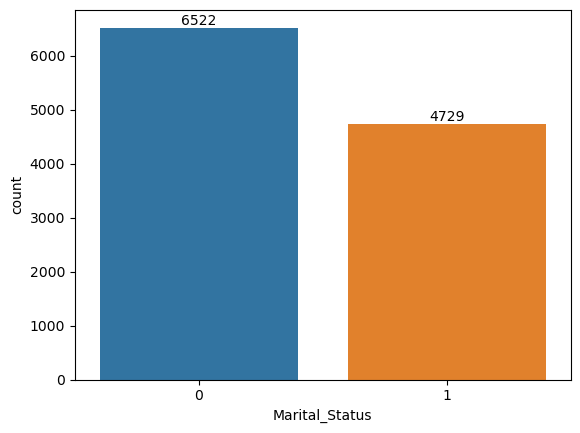

In [35]:
ac= sb.countplot(data = df, x = 'Marital_Status')

for bars in ac.containers:
    ac.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

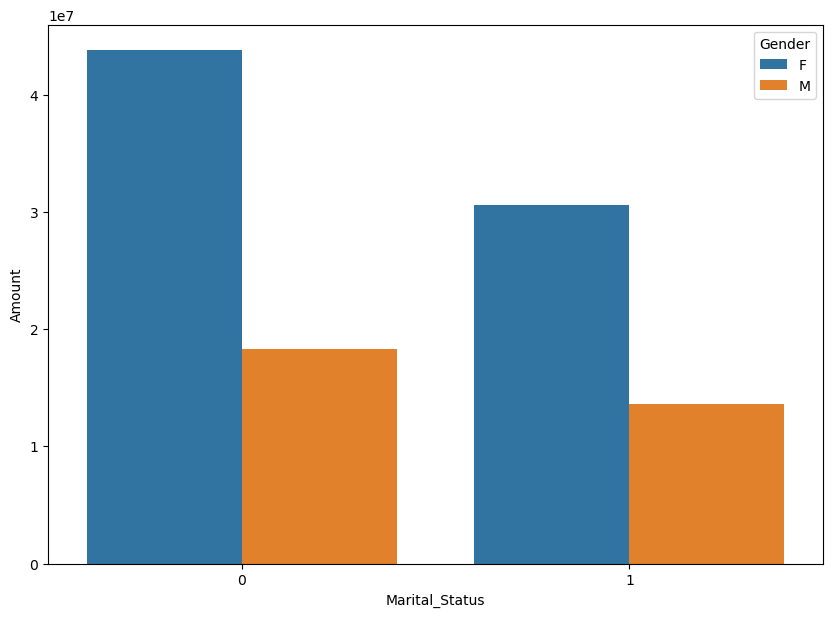

In [36]:
sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(10,7))
sb.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

## Occupation

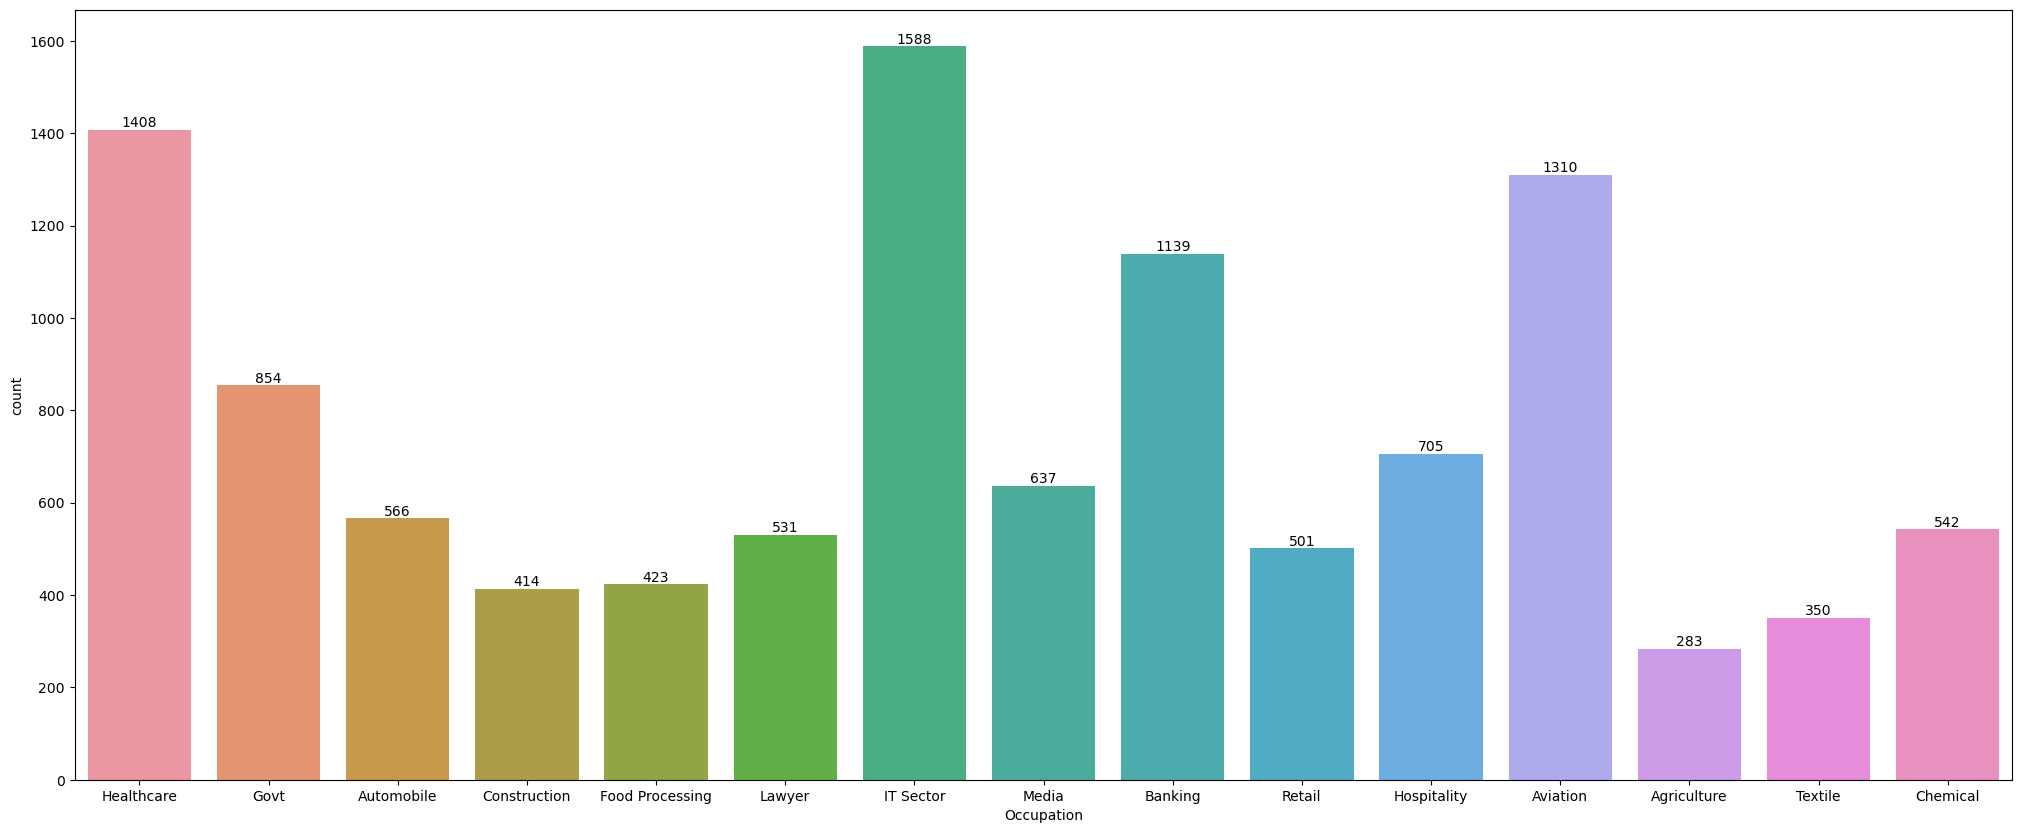

In [49]:
plt.figure(figsize=(25,10))
ax=sb.countplot(data = df, x = 'Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

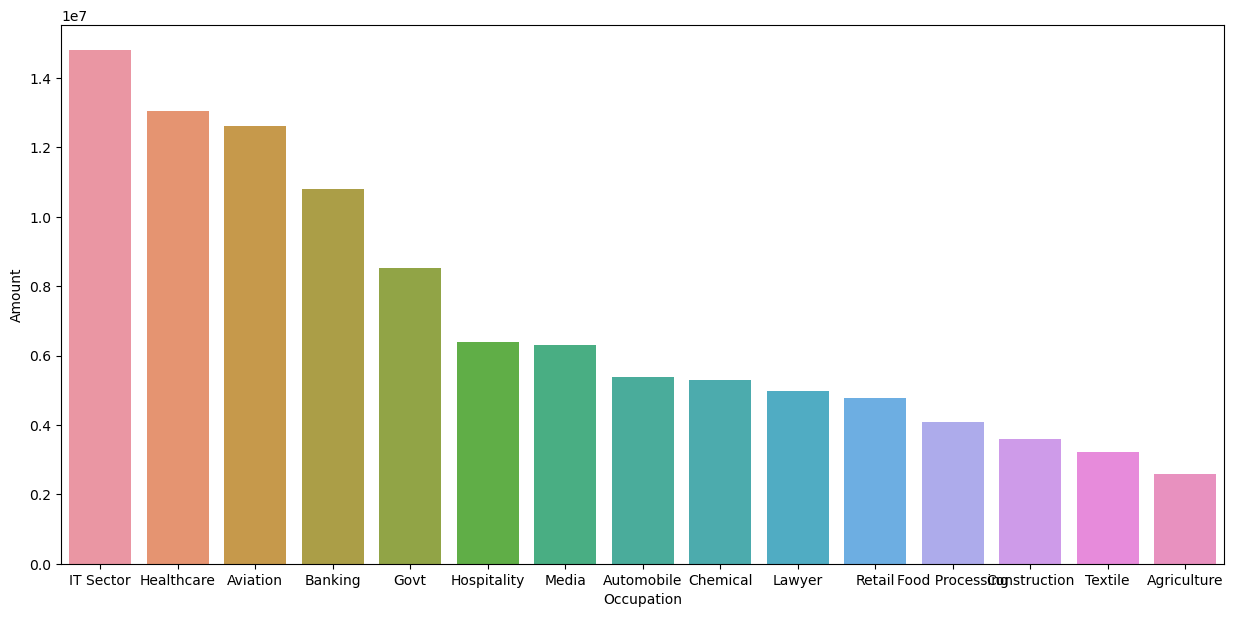

In [52]:
sales_s=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(15,7))
sb.barplot(data=sales_s,x='Occupation',y='Amount')

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

## Product Category

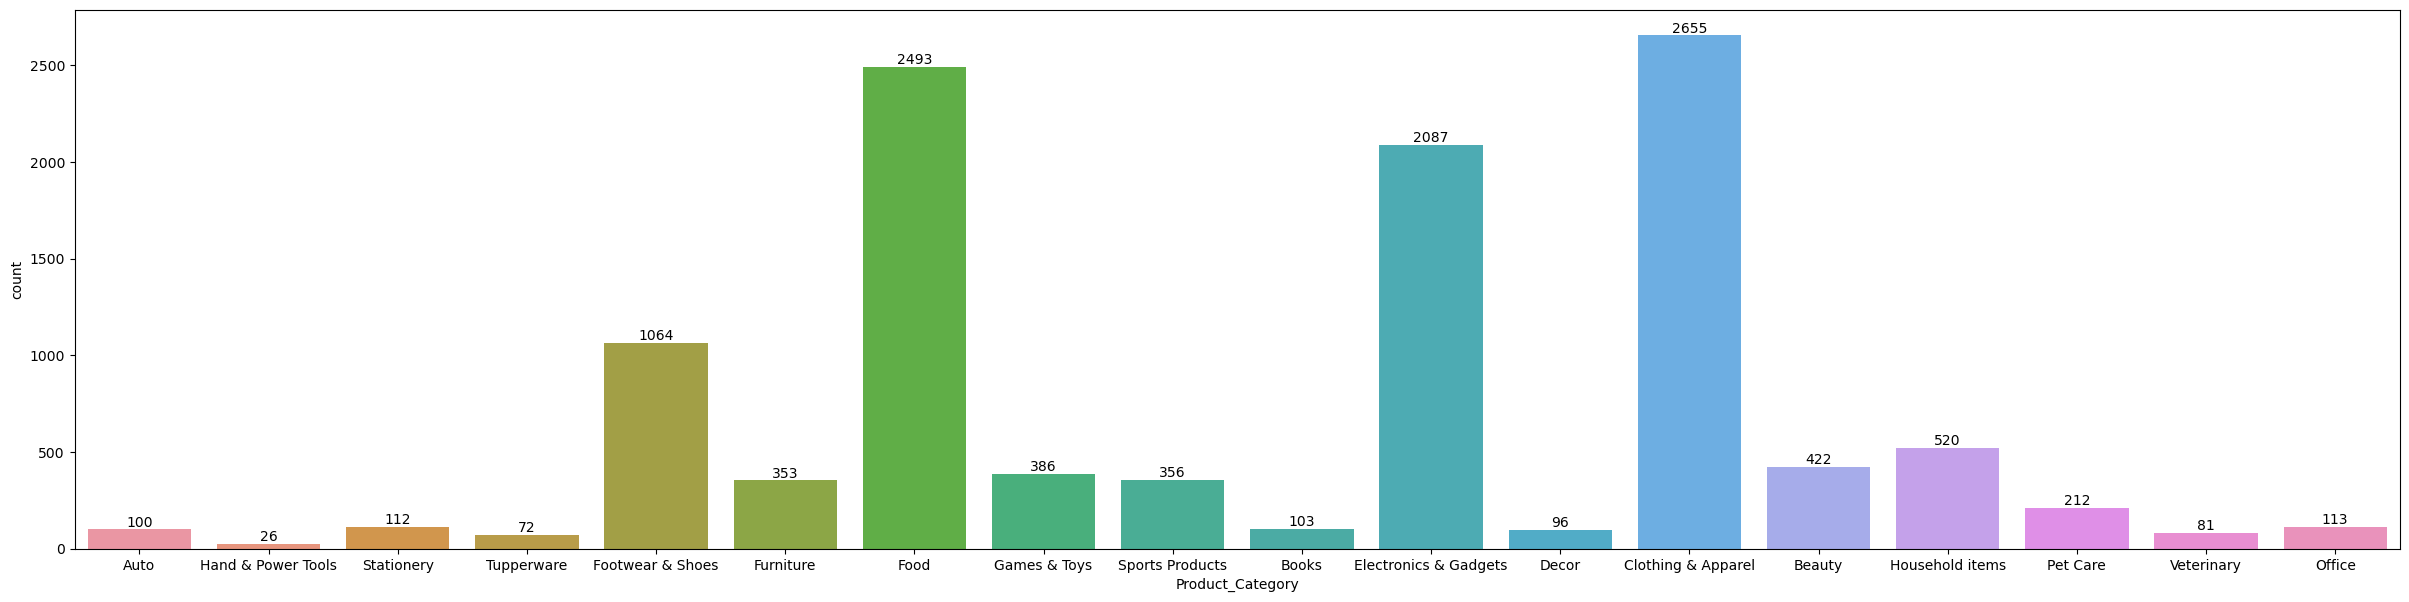

In [61]:
plt.figure(figsize=(30,7))
xy=sb.countplot(data=df,x='Product_Category')
for bars in xy.containers:
    xy.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

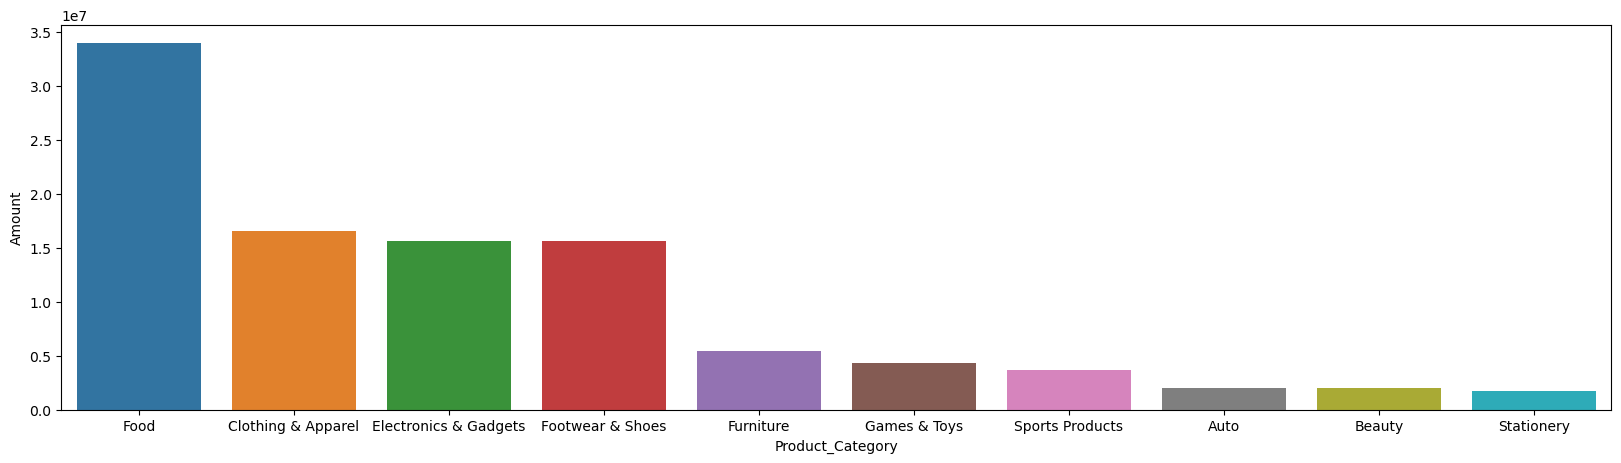

In [67]:
sales_s=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(20,5))
sb.barplot(data = sales_s, x ='Product_Category',y='Amount')

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

## Product ID

<Axes: xlabel='Product_ID', ylabel='Orders'>

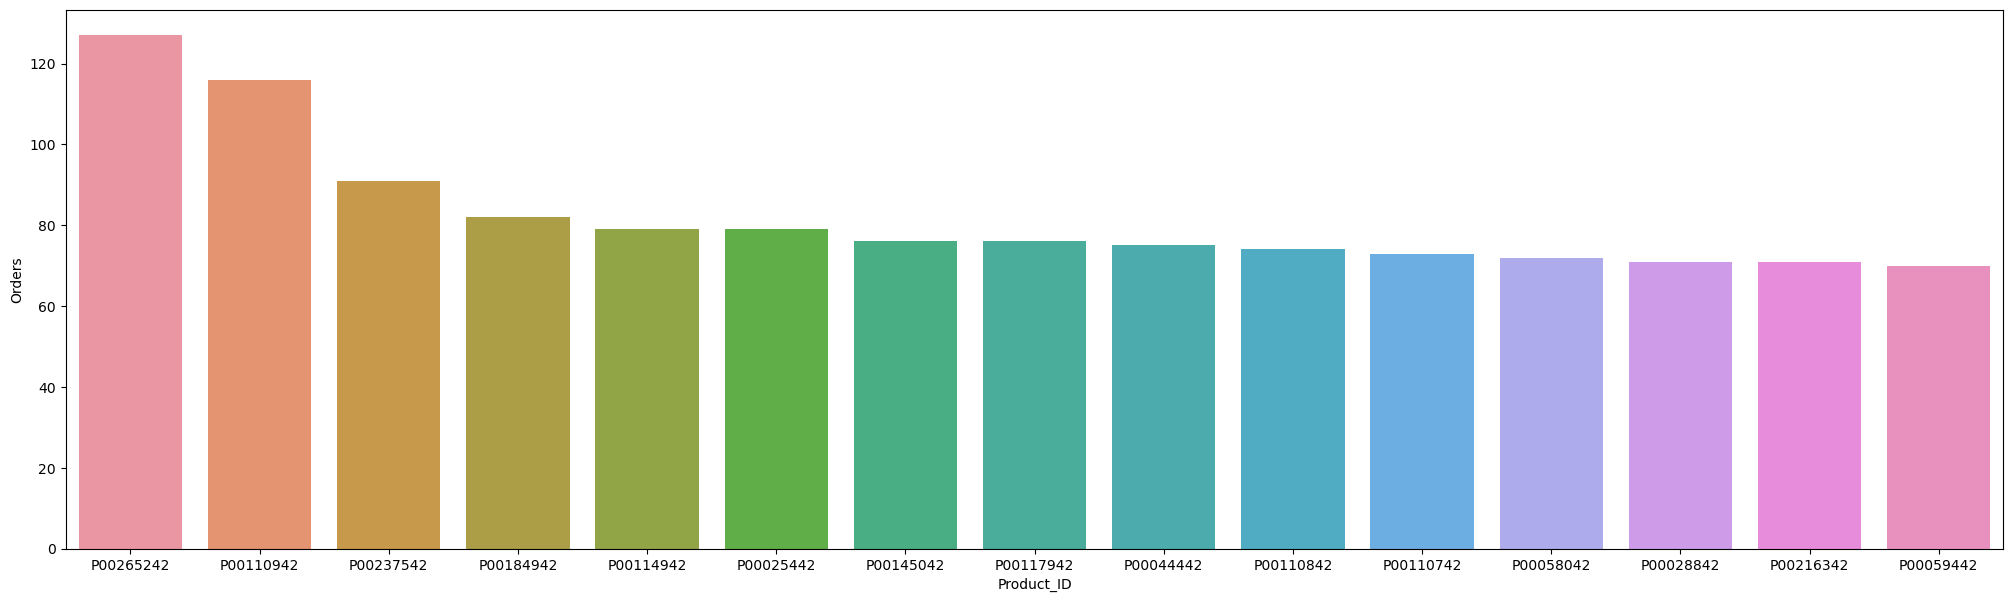

In [72]:
sales_s=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(15)
plt.figure(figsize=(25,7))
sb.barplot(data=sales_s,x='Product_ID',y='Orders')

Top 10 most sold products(same thing as above)

<Axes: xlabel='Product_ID'>

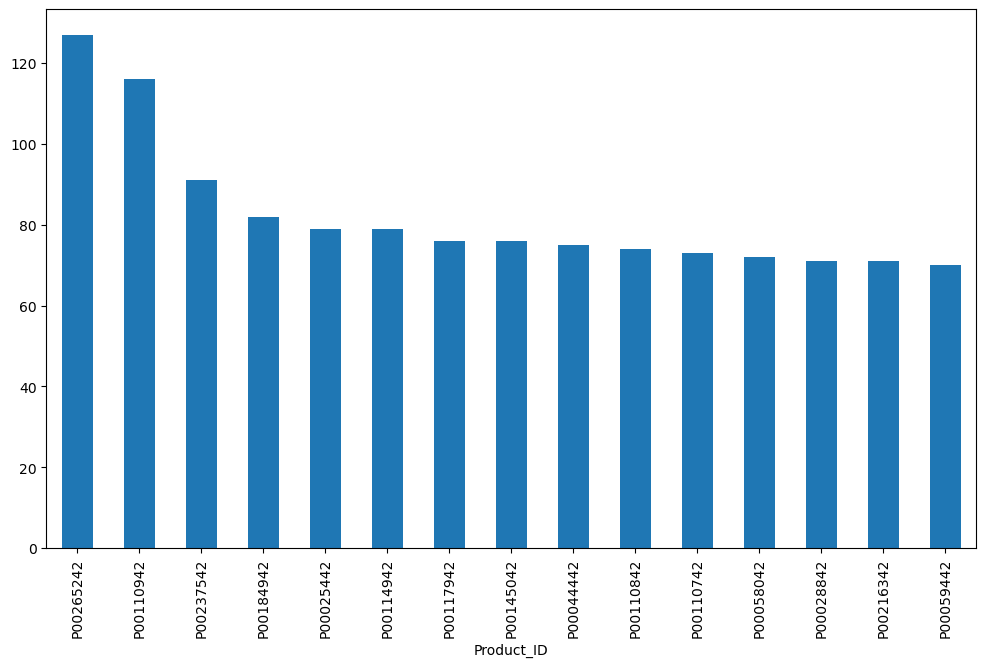

In [75]:
fig1, ax=plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(15).sort_values(ascending=False).plot(kind='bar')

# Conclusion:

Married women age group 26-35 years from Uttar Pradesh, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from food, clothing and electronics category. 